# Obter arquivos

In [2]:
import zipfile
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os

In [3]:
!wget https://github.com/lszam/geodata-processing/raw/refs/heads/main/remote_sensing/projeto_geoproc/zip_das_areas/sig_apiai_vr.zip
!wget https://github.com/lszam/geodata-processing/raw/refs/heads/main/remote_sensing/projeto_geoproc/zip_das_areas/sig_capao_bonito.zip
!wget https://github.com/lszam/geodata-processing/raw/refs/heads/main/remote_sensing/projeto_geoproc/zip_das_areas/sig_cerro_azul_vr.zip
!wget https://github.com/lszam/geodata-processing/raw/refs/heads/main/remote_sensing/projeto_geoproc/zip_das_areas/sig_eldorado_paulista_vr.zip
!wget https://github.com/lszam/geodata-processing/raw/refs/heads/main/remote_sensing/projeto_geoproc/zip_das_areas/sig_guapiara.zip
!wget https://github.com/lszam/geodata-processing/raw/refs/heads/main/remote_sensing/projeto_geoproc/zip_das_areas/sig_iguape_vr.zip
!wget https://github.com/lszam/geodata-processing/raw/refs/heads/main/remote_sensing/projeto_geoproc/zip_das_areas/sig_itarare_vr.zip
!wget https://github.com/lszam/geodata-processing/raw/refs/heads/main/remote_sensing/projeto_geoproc/zip_das_areas/sig_registro_vr.zip

--2025-05-07 13:51:16--  https://github.com/lszam/geodata-processing/raw/refs/heads/main/remote_sensing/projeto_geoproc/zip_das_areas/sig_apiai_vr.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/lszam/geodata-processing/refs/heads/main/remote_sensing/projeto_geoproc/zip_das_areas/sig_apiai_vr.zip [following]
--2025-05-07 13:51:16--  https://raw.githubusercontent.com/lszam/geodata-processing/refs/heads/main/remote_sensing/projeto_geoproc/zip_das_areas/sig_apiai_vr.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1684647 (1.6M) [application/zip]
Saving to: ‘sig_apiai_vr.zip’

sig_apiai_vr.z

In [4]:
def unpack_zip_files(directory):
  """Unpacks all zip files in the specified directory.

  Args:
      directory: The directory to search for zip files.
  """
  for filename in os.listdir(directory):
    if filename.endswith(".zip"):
      zip_filepath = os.path.join(directory, filename)
      try:
        with zipfile.ZipFile(zip_filepath, 'r') as zip_ref:
          zip_ref.extractall(directory)
          print(f"Unzipped: {filename}")
      except zipfile.BadZipFile:
        print(f"Error: Invalid zip file - {filename}")
      except Exception as e:
        print(f"Error unzipping {filename}: {e}")

# Example usage (replace with the actual directory)
unpack_zip_files("/content")


Unzipped: sig_apiai_vr.zip
Unzipped: sig_capao_bonito.zip
Unzipped: sig_itarare_vr.zip
Unzipped: sig_registro_vr.zip
Unzipped: sig_cerro_azul_vr.zip
Unzipped: sig_iguape_vr.zip
Unzipped: sig_guapiara.zip
Unzipped: sig_eldorado_paulista_vr.zip


# Plotar shapefiles lito

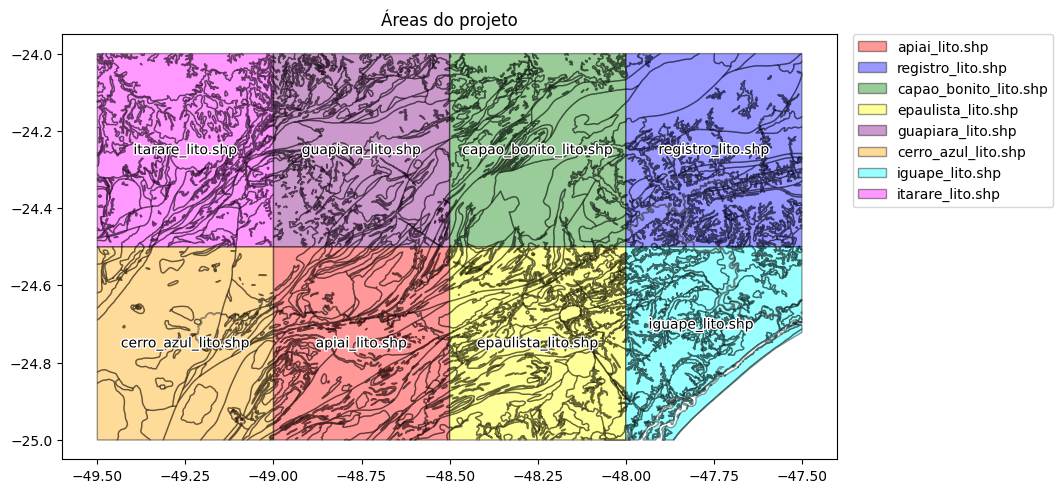

In [5]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
from matplotlib.patches import Patch

shp_files = []
for root, _, files in os.walk("/content"):
    for file in files:
        if file.endswith(".shp") and "lito" in file:
            shp_files.append(os.path.join(root, file))


fig, ax = plt.subplots(figsize=(10, 10))
colors = ['red', 'blue', 'green', 'yellow', 'purple', 'orange', 'cyan', 'magenta']

legend_handles = []

for i, shp_file in enumerate(shp_files):
    try:
        gdf = gpd.read_file(shp_file)

        # Plotar polígono
        gdf.plot(
            ax=ax,
            color=colors[i % len(colors)],
            edgecolor="black",
            alpha=0.4
        )

        # Unir todas as feições e calcular o centróide
        union = gdf.geometry.union_all()
        centroid = union.centroid

        # Adicionar o texto com nome
        ax.text(
            centroid.x,
            centroid.y,
            os.path.basename(shp_file),
            fontsize=10,
            #fontweight="bold",
            ha="center",
            va="center",
            path_effects=[pe.withStroke(linewidth=2, foreground="white")]
        )

        # Preparar handle para a legenda
        legend_handles.append(
            Patch(
                facecolor=colors[i % len(colors)],
                edgecolor="black",
                alpha=0.4,
                label=os.path.basename(shp_file)
            )
        )

    except Exception as e:
        print(f"Erro em {shp_file}: {e}")

ax.set_title("Áreas do projeto")
ax.legend(
    handles=legend_handles,
    loc='upper left',
    bbox_to_anchor=(1.02, 1),   # x=1.02 (2% fora à direita), y=1 (topo)
    borderaxespad=0.0
)

plt.show()
